# Project - Mark Dillon

In [1]:
#import necessary packages to begin
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Read in CSV file for 1st dataset
golf_stats = pd.read_csv("C:/Users/Mark/Desktop/Intro_to_Data-Analytics_UCD_Mark_Dillon/Datasets/PGA Tour Data 15-22/pga1522raw.csv", parse_dates=['date'])
print(golf_stats.head())

  Player_initial_last  tournament id  player id  hole_par  strokes  hole_DKP  \
0            A. Ancer      401353224       9261       288      289      60.0   
1           A. Hadwin      401353224       5548       288      286      72.5   
2           A. Lahiri      401353224       4989       144      147      21.5   
3             A. Long      401353224       6015       144      151      20.5   
4            A. Noren      401353224       3832       144      148      23.5   

   hole_FDP  hole_SDP  streak_DKP  streak_FDP  ...  purse  season  no_cut  \
0      51.1        56           3         7.6  ...   12.0    2022       0   
1      61.5        61           8        13.0  ...   12.0    2022       0   
2      17.4        27           0         0.0  ...   12.0    2022       0   
3      13.6        17           0         0.4  ...   12.0    2022       0   
4      18.1        23           0         1.2  ...   12.0    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_t

# Checking the dataset

In [3]:
#check data types and null counts
golf_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player_initial_last  36864 non-null  object        
 1   tournament id        36864 non-null  int64         
 2   player id            36864 non-null  int64         
 3   hole_par             36864 non-null  int64         
 4   strokes              36864 non-null  int64         
 5   hole_DKP             36864 non-null  float64       
 6   hole_FDP             36864 non-null  float64       
 7   hole_SDP             36864 non-null  int64         
 8   streak_DKP           36864 non-null  int64         
 9   streak_FDP           36864 non-null  float64       
 10  streak_SDP           36864 non-null  int64         
 11  n_rounds             36864 non-null  int64         
 12  made_cut             36864 non-null  int64         
 13  pos                  21317 non-

In [4]:
golf_stats.dtypes

Player_initial_last            object
tournament id                   int64
player id                       int64
hole_par                        int64
strokes                         int64
hole_DKP                      float64
hole_FDP                      float64
hole_SDP                        int64
streak_DKP                      int64
streak_FDP                    float64
streak_SDP                      int64
n_rounds                        int64
made_cut                        int64
pos                           float64
finish_DKP                      int64
finish_FDP                      int64
finish_SDP                      int64
total_DKP                     float64
total_FDP                     float64
total_SDP                       int64
player                         object
Unnamed: 2                    float64
Unnamed: 3                    float64
Unnamed: 4                    float64
tournament name                object
course                         object
date        

In [5]:
#checking number of nulls
golf_stats.isna().any()

Player_initial_last    False
tournament id          False
player id              False
hole_par               False
strokes                False
hole_DKP               False
hole_FDP               False
hole_SDP               False
streak_DKP             False
streak_FDP             False
streak_SDP             False
n_rounds               False
made_cut               False
pos                     True
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
player                 False
Unnamed: 2              True
Unnamed: 3              True
Unnamed: 4              True
tournament name        False
course                 False
date                   False
purse                  False
season                 False
no_cut                 False
Finish                  True
sg_putt                 True
sg_arg                  True
sg_app                  True
sg_ott        

In [6]:
golf_stats.isnull().sum()

Player_initial_last        0
tournament id              0
player id                  0
hole_par                   0
strokes                    0
hole_DKP                   0
hole_FDP                   0
hole_SDP                   0
streak_DKP                 0
streak_FDP                 0
streak_SDP                 0
n_rounds                   0
made_cut                   0
pos                    15547
finish_DKP                 0
finish_FDP                 0
finish_SDP                 0
total_DKP                  0
total_FDP                  0
total_SDP                  0
player                     0
Unnamed: 2             36864
Unnamed: 3             36864
Unnamed: 4             36864
tournament name            0
course                     0
date                       0
purse                      0
season                     0
no_cut                     0
Finish                  7683
sg_putt                 7684
sg_arg                  7684
sg_app                  7684
sg_ott        

In [7]:
golf_stats.describe()

,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,3.686400e+04,3.686400e+04,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,...,0.0,36864.000000,36864.000000,36864.000000,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29181.000000
mean,2.331807e+08,7.979041e+04,225.547065,224.114502,50.130249,44.375789,49.323703,1.764052,7.686844,1.683485,...,NaN,7.529612,2018.539686,0.065294,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305491
std,1.979221e+08,5.753816e+05,70.295590,66.789007,24.025854,24.153313,22.202915,2.846552,7.252924,2.668202,...,NaN,2.192712,2.213050,0.247047,1.119451,0.727315,1.119763,0.808139,1.640817,1.966669
min,2.230000e+03,5.000000e+00,70.000000,66.000000,-2.500000,-21.400000,-11.000000,0.000000,0.000000,0.000000,...,NaN,3.000000,2015.000000,0.000000,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,2.696000e+03,1.170000e+03,143.000000,146.000000,27.000000,22.600000,28.000000,0.000000,0.800000,0.000000,...,NaN,6.400000,2017.000000,0.000000,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,4.010565e+08,3.793000e+03,280.000000,272.000000,53.500000,46.100000,55.000000,0.000000,6.400000,0.000000,...,NaN,7.100000,2019.000000,0.000000,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,4.012195e+08,6.151000e+03,286.000000,281.000000,69.000000,64.000000,69.000000,3.000000,12.400000,3.000000,...,NaN,8.700000,2021.000000,0.000000,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.013669e+08,4.845309e+06,292.000000,325.000000,174.000000,134.700000,107.000000,23.000000,43.600000,22.000000,...,NaN,20.000000,2022.000000,1.000000,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


# Cleaning the data

In [8]:
# Remove columns with no data
golf_stats.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
golf_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player_initial_last  36864 non-null  object        
 1   tournament id        36864 non-null  int64         
 2   player id            36864 non-null  int64         
 3   hole_par             36864 non-null  int64         
 4   strokes              36864 non-null  int64         
 5   hole_DKP             36864 non-null  float64       
 6   hole_FDP             36864 non-null  float64       
 7   hole_SDP             36864 non-null  int64         
 8   streak_DKP           36864 non-null  int64         
 9   streak_FDP           36864 non-null  float64       
 10  streak_SDP           36864 non-null  int64         
 11  n_rounds             36864 non-null  int64         
 12  made_cut             36864 non-null  int64         
 13  pos                  21317 non-

In [10]:
#Relacing null values by column
golf_stats['pos'] = golf_stats['pos'].fillna(0)
golf_stats['sg_putt'] = golf_stats['sg_putt'].fillna(0)

In [11]:
#Replacing all null columns in dataframe at once, when happy we can
golf_stats.fillna(value = 0,
          inplace = True)

In [12]:
#Re-check data types and null counts
golf_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player_initial_last  36864 non-null  object        
 1   tournament id        36864 non-null  int64         
 2   player id            36864 non-null  int64         
 3   hole_par             36864 non-null  int64         
 4   strokes              36864 non-null  int64         
 5   hole_DKP             36864 non-null  float64       
 6   hole_FDP             36864 non-null  float64       
 7   hole_SDP             36864 non-null  int64         
 8   streak_DKP           36864 non-null  int64         
 9   streak_FDP           36864 non-null  float64       
 10  streak_SDP           36864 non-null  int64         
 11  n_rounds             36864 non-null  int64         
 12  made_cut             36864 non-null  int64         
 13  pos                  36864 non-

In [13]:
#rechecking the nulls count again
golf_stats.isnull().sum()

Player_initial_last    0
tournament id          0
player id              0
hole_par               0
strokes                0
hole_DKP               0
hole_FDP               0
hole_SDP               0
streak_DKP             0
streak_FDP             0
streak_SDP             0
n_rounds               0
made_cut               0
pos                    0
finish_DKP             0
finish_FDP             0
finish_SDP             0
total_DKP              0
total_FDP              0
total_SDP              0
player                 0
tournament name        0
course                 0
date                   0
purse                  0
season                 0
no_cut                 0
Finish                 0
sg_putt                0
sg_arg                 0
sg_app                 0
sg_ott                 0
sg_t2g                 0
sg_total               0
dtype: int64

In [14]:
#Convert datatypes to str format
golf_stats['tournament name'] = golf_stats['tournament name'].astype('string')
golf_stats['player'] = golf_stats['player'].astype('string')
golf_stats['course'] = golf_stats['course'].astype('string')

In [15]:
golf_stats["tournament name"].dtypes

string[python]

In [16]:
#Set index of dataframe to combined uique column with player, tournament and date
golf_stats.set_index(['date','player id','tournament id'],inplace=True)

In [17]:
#Sort by index to check
golf_stats.sort_index()

Player_initial_last  hole_par  strokes  \
date       player id tournament id                                          
2014-10-12 5         2271                   R. Allenby       288      277   
           11        2271                   S. Appleby       288      290   
           16        2271                  A. Baddeley       288      283   
           68        2271                  C. Campbell       288      284   
           144       2271                    H. Frazar       288      289   
...                                                ...       ...      ...   
2022-06-05 4364873   401353224              V. Hovland       288      293   
           4410932   401353224                  M. Lee       144      149   
           4412121   401353224                M. Wolff       144      148   
           4425906   401353224                C. Young       288      295   
           4691933   401353224                  J. Pak       144      153   

                                    hole_DKP  hole_FDP  hole_SDP  streak_DKP  \
date       player id tournament id                                             
2014-10-12 5         2271               78.0      74.7        76           0   
           11        2271               57.0      49.0        54           3   
           16        2271               70.0      63.9        64           3   
           68        2271               64.0      59.6        64           0   
           144       2271               51.5      46.6        59           0   
...                                      ...       ...       ...         ...   
2022-06-05 4364873   401353224          57.5      43.6        51           0   
           4410932   401353224          22.5      16.6        21           0   
           4412121   401353224          23.5      18.1        23           3   
           4425906   401353224          54.5      42.6        52           0   
           4691933   401353224          16.5      10.0        13           0   

                                    streak_FDP  streak_SDP  n_rounds  ...  \
date       player id tournament id                                    ...   
2014-10-12 5         2271                 11.6           0         4  ...   
           11        2271                  7.8           3         4  ...   
           16        2271                 13.2           3         4  ...   
           68        2271                  7.6           0         4  ...   
           144       2271                  1.0           0         4  ...   
...                                        ...         ...       ...  ...   
2022-06-05 4364873   401353224            12.2           0         4  ...   
           4410932   401353224             1.2           0         2  ...   
           4412121   401353224             1.2           3         2  ...   
           4425906   401353224             6.0           0         4  ...   
           4691933   401353224             0.6           0         2  ...   

                                    purse  season  no_cut  Finish  sg_putt  \
date       player id tournament id                                           
2014-10-12 5         2271             6.0    2015       0       0     0.00   
           11        2271             6.0    2015       0       0     0.00   
           16        2271             6.0    2015       0       0     0.00   
           68        2271             6.0    2015       0       0     0.00   
           144       2271             6.0    2015       0       0     0.00   
...                                   ...     ...     ...     ...      ...   
2022-06-05 4364873   401353224       12.0    2022       0     T51     1.46   
           4410932   401353224       12.0    2022       0       0     0.00   
           4412121   401353224       12.0    2022       0     CUT     1.05   
           4425906   401353224       12.0    2022       0     T60    -0.68   
           4691933   401353224       12.0    2022     

In [18]:
#Change sorting back to Alphabetical on Player_initial_last, then by Tournament Name
golf_stats.sort_values(['Player_initial_last','tournament name'])

,,,Player_initial_last,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,n_rounds,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
date,player id,tournament id,,,,,,,,,,,,,,,,,,,,,
2019-07-07,10357,401056558,A. Albertson,142,139,35.0,31.8,37,3,6.8,3,2,...,6.4,2019,0,MDF,1.28,-0.58,-0.85,-0.65,-2.08,-0.80
2019-05-12,10357,401056551,A. Albertson,142,145,24.0,20.1,24,0,1.4,0,2,...,7.9,2019,0,CUT,-2.26,0.05,0.33,-0.26,0.12,-2.14
2019-02-11,10357,401056514,A. Albertson,215,216,44.0,37.3,44,0,1.6,0,3,...,7.6,2019,0,CUT,-2.15,-0.34,0.49,-0.04,0.11,-2.04
2019-03-10,10357,401056521,A. Albertson,144,152,10.0,6.0,20,0,0.0,0,2,...,9.1,2019,0,CUT,-1.47,-0.48,-1.14,-0.38,-2.00,-3.48
2019-07-21,10357,401056546,A. Albertson,288,271,93.0,90.3,82,17,27.4,13,4,...,3.5,2019,0,T18,-0.19,-0.15,1.73,0.36,1.94,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,4708,401155421,Z. Sucher,142,146,26.0,20.8,20,0,6.0,0,2,...,7.3,2020,0,CUT,-2.30,0.48,-0.26,-0.39,-0.17,-2.47
2019-05-05,4708,401056550,Z. Sucher,284,285,59.0,50.7,58,0,2.2,0,4,...,7.9,2019,0,T50,-0.42,-0.07,-0.23,1.05,0.76,0.34
2017-05-07,4708,3067,Z. Sucher,144,149,17.5,13.8,23,0,0.2,0,2,...,7.5,2017,0,CUT,-0.88,-0.18,-0.44,0.08,-0.54,-1.41


In [19]:
#Check for duplicated 
golf_stats.index.duplicated()

array([False, False, False, ..., False, False, False])

In [20]:
#Drop the reoccurrence of the indice, keep the first
golf_stats.index.drop_duplicates(keep='first')

MultiIndex([('2022-06-05',  9261, 401353224),
            ('2022-06-05',  5548, 401353224),
            ('2022-06-05',  4989, 401353224),
            ('2022-06-05',  6015, 401353224),
            ('2022-06-05',  3832, 401353224),
            ('2022-06-05',  5502, 401353224),
            ('2022-06-05', 10906, 401353224),
            ('2022-06-05', 10372, 401353224),
            ('2022-06-05',   388, 401353224),
            ('2022-06-05',  9484, 401353224),
            ...
            ('2014-10-12',  6086,      2271),
            ('2014-10-12',   215,      2271),
            ('2014-10-12',  3970,      2271),
            ('2014-10-12',  3295,      2271),
            ('2014-10-12',  1157,      2271),
            ('2014-10-12',   392,      2271),
            ('2014-10-12',  7082,      2271),
            ('2014-10-12',  3532,      2271),
            ('2014-10-12',  9040,      2271),
            ('2014-10-12',  4708,      2271)],
           names=['date', 'player id', 'tournament id'], length

In [21]:
duplicated_rows = golf_stats[golf_stats.index.duplicated()]
print(duplicated_rows)


                                   Player_initial_last  hole_par  strokes  \
date       player id tournament id                                          
2021-10-17 7081      401353196                  S. Kim       288      288   
2020-10-18 7081      401219796                  S. Kim       288      281   
2018-08-12 686       401025263              Z. Johnson       280      273   
2018-03-18 3950      3750                       D. Lee       144      148   
2018-02-18 7081      3748                       S. Kim       142      146   
2017-11-19 10054     3781                  D. McCarthy       142      143   
2016-08-21 3950      2495                       D. Lee       140      141   
2016-08-14 9131      2510                     C. Smith       284      273   
2016-07-24 3950      2509                       D. Lee       288      284   
2016-06-12 9131      2502                     C. Smith       140      153   
2016-06-05 3950      2499                       D. Lee       288      284   

In [22]:
golf_stats.index.duplicated().sum()

21

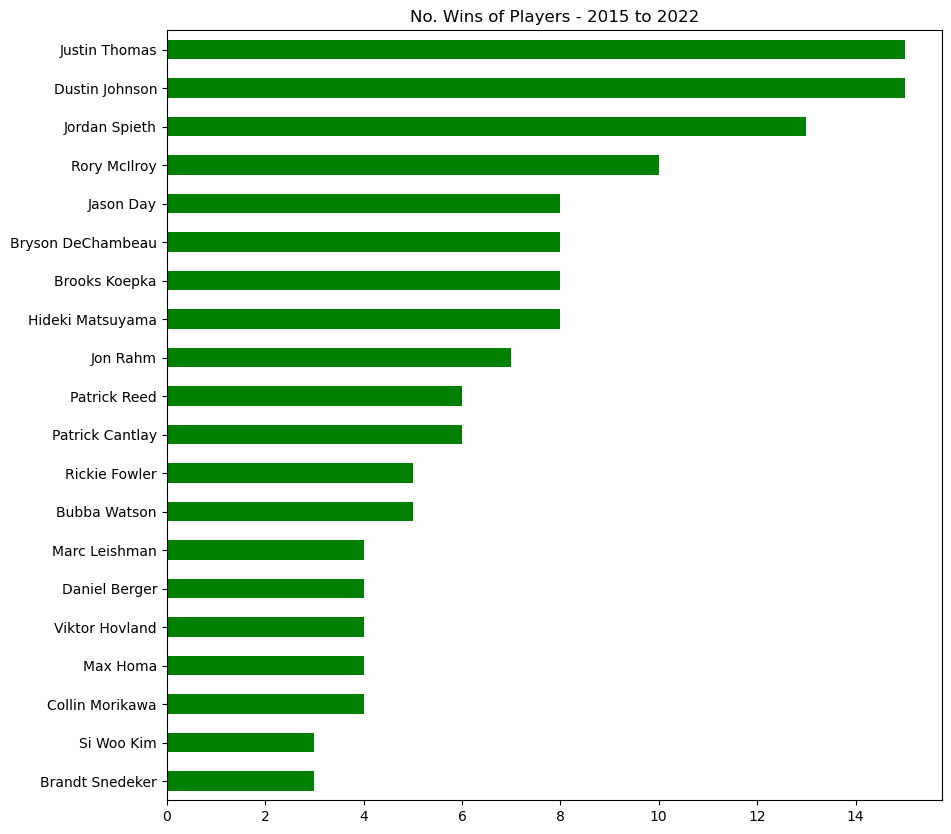

In [23]:
# Find player with most wins over the entire period and visualise with Horizontal bar chart
plt.figure(figsize=(10,10))
golf_stats.loc[golf_stats['pos'] == 1]['player'].value_counts().head(20).plot(kind = 'barh', color = 'g').invert_yaxis()
plt.title('No. Wins of Players - 2015 to 2022')
plt.show()

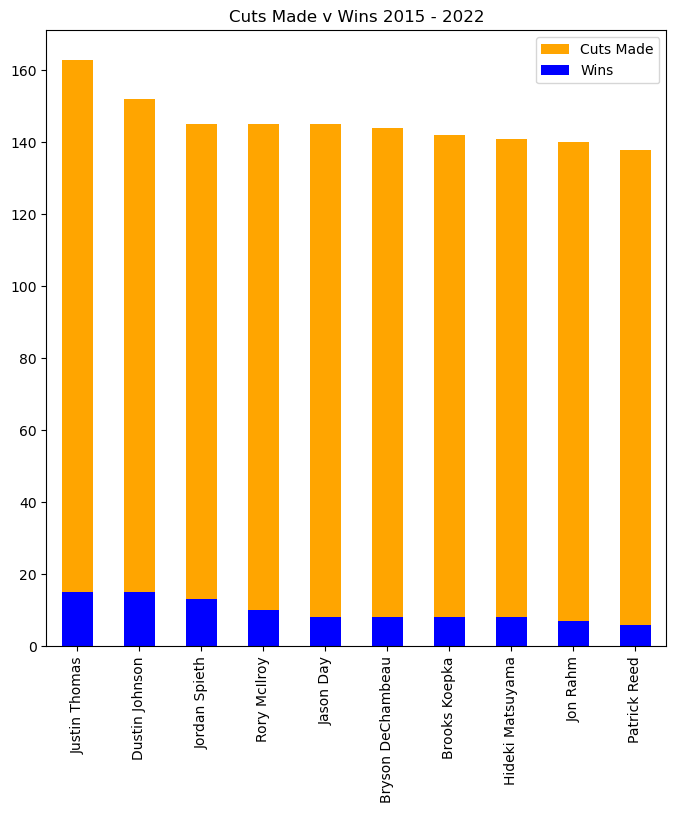

In [24]:
# Find the correlation with wins and cuts made
plt.figure(figsize=(8,8))
golf_stats.loc[golf_stats['made_cut'] == 1]['player'].value_counts().head(10).plot(kind = 'bar', color = 'orange')
golf_stats.loc[golf_stats['pos'] == 1]['player'].value_counts().head(10).plot(kind = 'bar', color = 'b')
plt.title('Cuts Made v Wins 2015 - 2022')
plt.legend(["Cuts Made", "Wins"])
plt.show()


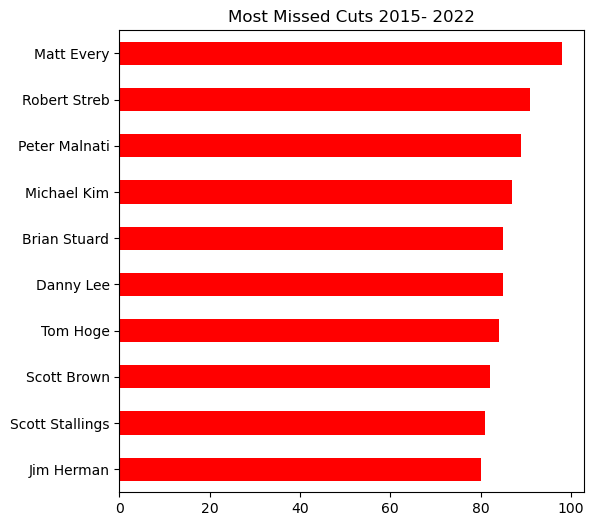

In [25]:
# Find player with most cuts made over the entire period and visualise with Horizontal bar chart
plt.figure(figsize=(6,6))
golf_stats.loc[golf_stats['made_cut'] == 0]['player'].value_counts().head(10).plot(kind = 'barh', color = 'r').invert_yaxis()
plt.title('Most Missed Cuts 2015- 2022')
plt.show()

# Grouping and Aggregating Data


In [26]:
golf_stats.mean()

C:\Users\Mark\AppData\Local\Temp\ipykernel_4048\419674469.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  golf_stats.mean()


hole_par       225.547065
strokes        224.114502
hole_DKP        50.130249
hole_FDP        44.375789
hole_SDP        49.323703
streak_DKP       1.764052
streak_FDP       7.686844
streak_SDP       1.683485
n_rounds         3.175266
made_cut         0.605903
pos             19.758219
finish_DKP       2.488959
finish_FDP       2.134169
finish_SDP       1.170573
total_DKP       54.383260
total_FDP       54.196802
total_SDP       52.177762
purse            7.529612
season        2018.539686
no_cut           0.065294
sg_putt         -0.095782
sg_arg          -0.032251
sg_app          -0.080548
sg_ott          -0.036329
sg_t2g          -0.149087
sg_total        -0.241822
dtype: float64

In [27]:
golf_core = golf_stats[["hole_par", "strokes", "n_rounds", "pos", "player", "tournament name", "course", "purse", "season", "sg_total"]]

In [28]:
golf_core.head()

hole_par  strokes  n_rounds   pos  \
date       player id tournament id                                      
2022-06-05 9261      401353224           288      289         4  32.0   
           5548      401353224           288      286         4  18.0   
           4989      401353224           144      147         2   0.0   
           6015      401353224           144      151         2   0.0   
           3832      401353224           144      148         2   0.0   

                                             player  \
date       player id tournament id                    
2022-06-05 9261      401353224        Abraham Ancer   
           5548      401353224          Adam Hadwin   
           4989      401353224       Anirban Lahiri   
           6015      401353224            Adam Long   
           3832      401353224      Alexander Noren   

                                                                tournament name  \
date       player id tournament id                                                
2022-06-05 9261      401353224      The Memorial Tournament pres. by Nationwide   
           5548      401353224      The Memorial Tournament pres. by Nationwide   
           4989      401353224      The Memorial Tournament pres. by Nationwide   
           6015      401353224      The Memorial Tournament pres. by Nationwide   
           3832      401353224      The Memorial Tournament pres. by Nationwide   

                                                                      course  \
date       player id tournament id                                             
2022-06-05 9261      401353224      Muirfield Village Golf Club - Dublin, OH   
           5548      401353224      Muirfield Village Golf Club - Dublin, OH   
           4989      401353224      Muirfield Village Golf Club - Dublin, OH   
           6015      401353224      Muirfield Village Golf Club - Dublin, OH   
           3832      401353224      Muirfield Village Golf Club - Dublin, OH   

                                    purse  season  sg_total  
date       player id tournament id                           
2022-06-05 9261      401353224       12.0    2022      0.85  
           5548      401353224       12.0    2022      1.60  
           4989      401353224       12.0    2022     -0.54  
           6015      401353224       12.0    2022     -2.54  
           3832      401353224       12.0    2022     -1.04

In [140]:
#Display aggregate data grouped by tournament
tournament_stats = golf_core.groupby(['tournament name'])['strokes'].agg(['mean','median','std'])
print(tournament_stats.head(10).sort_values(by='std',ascending=False))

                                                      mean  median        std
tournament name                                                              
Arnold Palmer Invitational Pres. by Mastercard  234.063804   282.0  68.523106
3M Open                                         203.713974   149.0  67.159589
AT&T Byron Nelson                               209.231668   264.0  66.711394
Barbasol Championship                           221.784708   270.0  66.530068
Bermuda Championship                            223.764706   272.0  66.519416
A Military Tribute at The Greenbrier            197.894040   146.0  66.221160
CareerBuilder Challenge                         176.528536   142.0  55.249286
AT&T Pebble Beach Pro-Am                        238.838035   224.0  44.285618
CIMB Classic                                    279.049383   280.0  11.788541
BMW Championship                                278.667360   279.0   8.788816


<AxesSubplot:xlabel='tournament name', ylabel='std'>

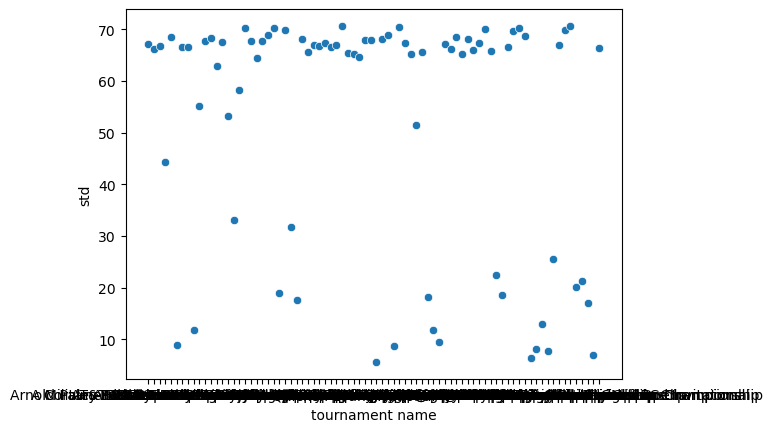

In [30]:
#Scatter plot to track variance in median scores over all tournament but not visually friendly
sns.scatterplot(x='tournament name',y='std', data=tournament_stats)

In [31]:
golf_core.reset_index()

,date,player id,tournament id,hole_par,strokes,n_rounds,pos,player,tournament name,course,purse,season,sg_total
0,2022-06-05,9261,401353224,288,289,4,32.0,Abraham Ancer,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",12.0,2022,0.85
1,2022-06-05,5548,401353224,288,286,4,18.0,Adam Hadwin,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",12.0,2022,1.60
2,2022-06-05,4989,401353224,144,147,2,0.0,Anirban Lahiri,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",12.0,2022,-0.54
3,2022-06-05,6015,401353224,144,151,2,0.0,Adam Long,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",12.0,2022,-2.54
4,2022-06-05,3832,401353224,144,148,2,0.0,Alexander Noren,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",12.0,2022,-1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,2014-10-12,392,2271,144,146,2,0.0,Vijay Singh,Frys.com Open,"Silverado Resort - Napa, CA",6.0,2015,0.00
36860,2014-10-12,7082,2271,144,150,2,0.0,Whee Kim,Frys.com Open,"Silverado Resort - Napa, CA",6.0,2015,0.00
36861,2014-10-12,3532,2271,216,215,3,999.0,William McGirt,Frys.com Open,"Silverado Resort - Napa, CA",6.0,2015,0.00
36862,2014-10-12,9040,2271,288,278,4,12.0,Zac Blair,Frys.com Open,"Silverado Resort - Napa, CA",6.0,2015,0.00


In [136]:
#Display the Tournament with largest mean purse over the 7 years
purses = golf_core.groupby(['tournament name'])['purse'].mean()
print(purses.sort_values(ascending=False))



tournament name
The Players Championship                        12.802126
U.S. Open                                       11.723780
PGA Championship                                11.222275
Masters Tournament                              11.217424
WGC-Workday Championship                        10.500000
                                                  ...    
Bermuda Championship                             4.484520
Barbasol Championship                            3.500000
Hero World Challenge                             3.471875
Corales Puntacana Resort & Club Championship     3.353199
Puerto Rico Open                                 3.095115
Name: purse, Length: 80, dtype: float64


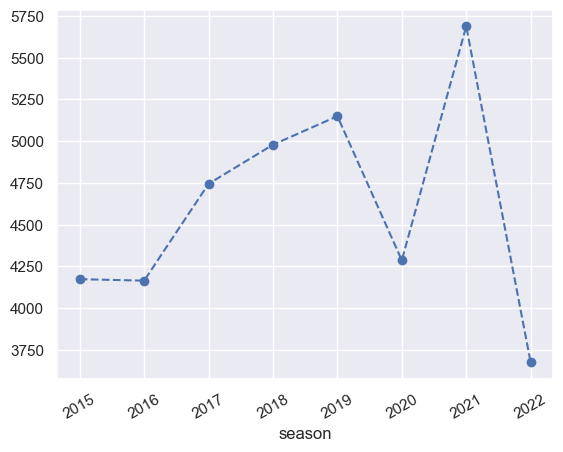

In [133]:
#plot of player numbers over the last 7 years
tourney_num = golf_core.groupby(['season']).count()['player']
# plot the result
tourney_num.plot(marker="o", ls="--")
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:title={'center':'PGA Tour Par vs Strokes'}, xlabel='hole_par'>

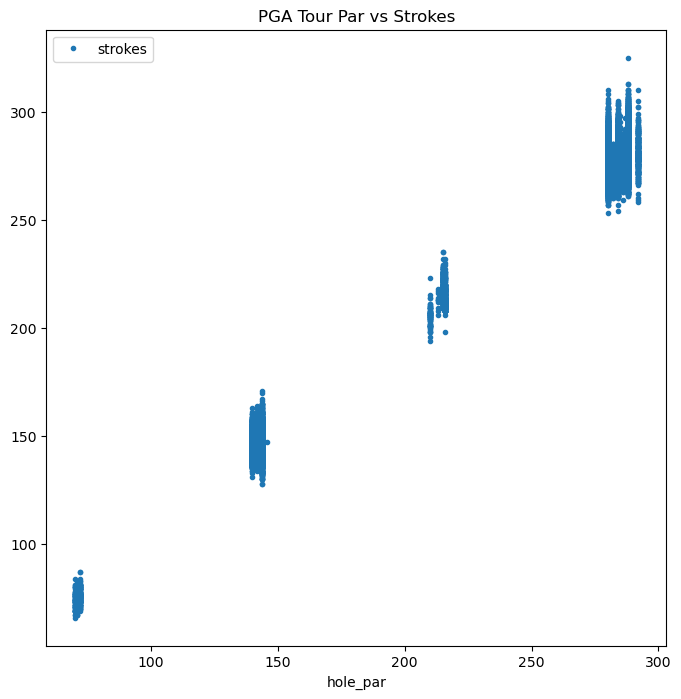

In [55]:
# Actual scores on Y axis versus tournament par strokes on the Y axis
golf_core.plot(x='hole_par', y='strokes', style='.', figsize=(8, 8), title='PGA Tour Par vs Strokes')

In [56]:
#Create new column for average strokes round per row for player
golf_core['avg single round'] = golf_core['strokes'] / golf_core['n_rounds']
print(golf_core['avg single round'].head())

date        player id  tournament id
2022-06-05  9261       401353224        72.25
            5548       401353224        71.50
            4989       401353224        73.50
            6015       401353224        75.50
            3832       401353224        74.00
Name: avg single round, dtype: float64


C:\Users\Mark\AppData\Local\Temp\ipykernel_4048\548059684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golf_core['avg single round'] = golf_core['strokes'] / golf_core['n_rounds']


In [57]:
golf_core.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36864 entries, (Timestamp('2022-06-05 00:00:00'), 9261, 401353224) to (Timestamp('2014-10-12 00:00:00'), 4708, 2271)
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hole_par          36864 non-null  int64  
 1   strokes           36864 non-null  int64  
 2   n_rounds          36864 non-null  int64  
 3   pos               36864 non-null  float64
 4   player            36864 non-null  string 
 5   tournament name   36864 non-null  string 
 6   course            36864 non-null  string 
 7   purse             36864 non-null  float64
 8   season            36864 non-null  int64  
 9   sg_total          36864 non-null  float64
 10  avg single round  36864 non-null  float64
dtypes: float64(4), int64(4), string(3)
memory usage: 4.4 MB


In [66]:
#Mean strokes by tournament by year using pivot table
strokes_by_tourney = (golf_core.pivot_table(values="strokes", index="season", columns="tournament name",fill_value=0))
print(strokes_by_tourney)

tournament name  3M Open                                           \
season                                                              
2015                                                     0.000000   
2016                                                     0.000000   
2017                                                     0.000000   
2018                                                     0.000000   
2019                                                   203.174194   
2020                                                   200.620915   
2021                                                   207.426667   
2022                                                     0.000000   

tournament name  A Military Tribute at The Greenbrier              \
season                                                              
2015                                                      0.00000   
2016                                                      0.00000   
2017                             

In [142]:
#Mean strokes by tournament by year using pivot table
strokes_by_year = (golf_core.pivot_table(values="strokes", index="tournament name", columns="season",fill_value=0))
print(strokes_by_year.head())

season                                                2015        2016  \
tournament name                                                          
3M Open                                           0.000000    0.000000   
A Military Tribute at The Greenbrier              0.000000    0.000000   
AT&T Byron Nelson                               205.717949  211.016529   
AT&T Pebble Beach Pro-Am                        241.920354  249.909091   
Arnold Palmer Invitational Pres. by Mastercard  227.925926    0.000000   

season                                                2017        2018  \
tournament name                                                          
3M Open                                           0.000000    0.000000   
A Military Tribute at The Greenbrier              0.000000    0.000000   
AT&T Byron Nelson                               216.054264  209.751825   
AT&T Pebble Beach Pro-Am                        247.007634  249.741259   
Arnold Palmer Invitational Pres. by M

<AxesSubplot:xlabel='strokes', ylabel='Density'>

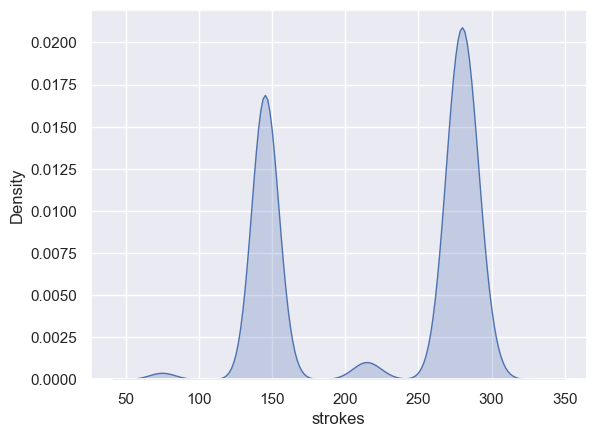

In [71]:
#Checking where majority of players strokes are, 2 peaks based of 2 and 4 round peaks
sns.set(style="darkgrid")
sns.kdeplot(data=golf_core['strokes'], shade=True)

In [149]:
#Analyze winners only
winners = golf_core[golf_core["pos"] == 1]
print(winners[["player","tournament name"]])

                                             player  \
date       player id tournament id                    
2022-06-05 1651      401353224       Billy Horschel   
2022-05-29 9938      401353225            Sam Burns   
2022-05-22 4848      401353226        Justin Thomas   
2022-05-15 7083      401353227      Kyoung-Hoon Lee   
2022-05-08 8973      401353228             Max Homa   
...                                             ...   
2014-11-09 3792      2254               Nick Taylor   
2014-11-02 809       2275                Ryan Moore   
2014-10-26 5619      2276              Robert Streb   
2014-10-19 4638      2260                Ben Martin   
2014-10-12 4015      2271             Sang-Moon Bae   

                                                                tournament name  
date       player id tournament id                                               
2022-06-05 1651      401353224      The Memorial Tournament pres. by Nationwide  
2022-05-29 9938      401353225        

In [92]:
#Investiage which courses players have won at more than once
winners_best_courses = winners[['course','player']].groupby(['course','player'])['player'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

In [95]:
#19 entries where players have won twice at a certain course
print(winners_best_courses.head(25))

                                            course            player  count
191             Sea Island Resort - Sea Island, GA      Robert Streb      2
269                    TPC Southwind - Memphis, TN     Daniel Berger      2
137       Muirfield Village Golf Club - Dublin, OH   Patrick Cantlay      2
263                TPC Scottsdale - Scottsdale, AZ  Hideki Matsuyama      2
284  The Club at Nine Bridges - Seoul, South Korea     Justin Thomas      2
174   Riviera Country Club - Pacific Palisades, CA      Bubba Watson      2
69               East Lake Golf Club - Atlanta, GA      Rory McIlroy      2
105                   Innisbrook - Palm Harbor, FL        Paul Casey      2
112                   Kapalua Resort - Kapalua, HI     Justin Thomas      2
122                   La Quinta CC - La Quinta, CA   Hudson Swafford      2
168              Quail Hollow Club - Charlotte, NC      Rory McIlroy      2
210                    Silverado Resort - Napa, CA    Brendan Steele      2
234      TPC

<AxesSubplot:title={'center':'Finishing Position v Strokes Gained (Top 60)'}, xlabel='Stroked Gained', ylabel='Position'>

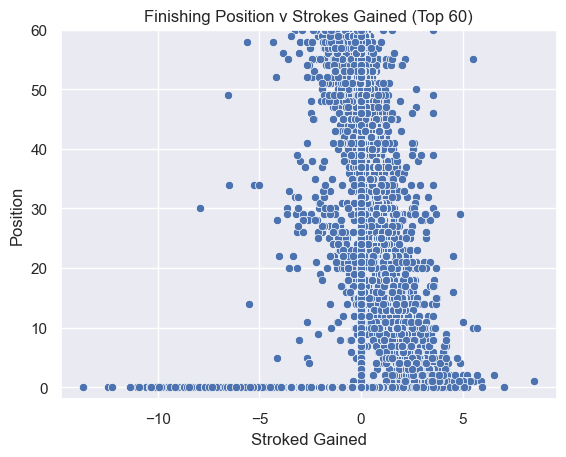

In [117]:
# Relation of strokes gained v finishing position
plt.ylim(-2,60)
plt.title('Finishing Position v Strokes Gained (Top 60)')
plt.xlabel('Stroked Gained')
plt.ylabel('Position')
sns.scatterplot(data=golf_core, x='sg_total',  y='pos') 